# 2023-6F - Projeto Aplicado - DMF

## Titulo: Modelo de Factor Investing para Balancemanto de Carteira

Backtesting para validação de ferramenta para gestão de carteiras com baseado na metodologia de Factor Investing.

### Fase 01 - Definir o universo de investimento
Nesta fase definimos em qual universo de ativos vamos trabalhar.
A definição da condição de contorno na qual vamos aplicar o factor investing é fundamental para aproveitar ao máximo essa abordagem estratégica.
Isso nos permite uma seleção cuidadosa e sistemática de ativos com base em fatores específicos, otimizando o potencial de retorno e gerenciando os riscos de forma mais eficaz.
#### Ativos que serão aceitos na carteira: somente as ações que compunham a carteira teórica do IBovespa no momento do balanceamento.

### Fase 02 - Escolher o fator que servirá como critério para criação dos rankings
O Momentum foi escolhido como o fator principal no desenvolvimento da ferramenta devido a uma extensa pesquisa acadêmica que comprovou sua eficácia na geração de retornos superiores consistentes, independentemente das características específicas do setor ou das condições macroeconômicas. A estratégia de momentum, baseada na tendência de desempenho passado, permite identificar ativos com maior probabilidade de continuar se valorizando ou desvalorizando, proporcionando uma abordagem sistemática e disciplinada na seleção de ativos e potencialmente melhorando o desempenho das carteiras de investimento.
#### Fator escolhido: Momentum 6 meses.

### Fase 03 - Escolher o período de teste
O período de 2016 a 2022 foi escolhido para o backtest da ferramenta de fator investing devido à sua relevância histórica e diversidade de eventos econômicos e políticos, incluindo mudanças políticas, a pandemia de COVID-19 e a atuação de diferentes presidentes do Banco Central, que proporcionam uma análise abrangente e representativa da estratégia de investimento.
#### Período escolhido: 2016 até 2022.

### Fase 04 - Escolher o número de ações na carteira
A escolha de trabalhar com 10 ações na carteira do estudo visa equilibrar a análise precisa e representativa com a factibilidade e recursos disponíveis.
#### Número de ativos: 10 ações.

### Fase 05 - Definir o período de balanceamento. A cada quanto tempo a carteira muda?
O rebalanceamento mensal da carteira foi escolhido para adaptar-se às mudanças do mercado, buscar oportunidades de investimento, gerenciar riscos e manter uma abordagem disciplinada e consistente na gestão dos ativos.
#### Período de rebalanceamento: Mensal.

### Fase 06 - Ler a composição histórica da carteira teórica do Ibovespa e os tickers que já passaram pelo índice no período definido na fase 03.
O levantamento dessas informações foram retiradas diretamente do site da B3 e organizadas no arquivo compatível com Excel.

In [3]:
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import mplcyberpunk

plt.style.use("cyberpunk")

Leitura dos dados do arquivo Excel em um dataframe pandas de composição histórica do Ibovespa e ações que já fizeram parte do índice em algum momento dentro do período de estudo.

In [4]:
composiacao_historica = pd.read_excel(r'Carteiras_IBOV.xlsx')
lista_acoes = pd.read_excel(r'Carteiras_IBOV.xlsx', sheet_name = 'Lista Ações')
lista_acoes.head()

,Tickers
0,ABEV3.SA
1,BBAS3.SA
2,BBDC3.SA
3,BBDC4.SA
4,BBSE3.SA


In [6]:
lista_acoes.describe()

,Tickers
count,140
unique,140
top,ABEV3.SA
freq,1


In [7]:
composiacao_historica.head()

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,...,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3
1,BBSE3,BBAS3,BBAS3,BBAS3,BBAS3,BBAS3,BBAS3,BBAS3,BBAS3,BBAS3,...,ALPA4,ALPA4,ALPA4,ALPA4,ALPA4,ALPA4,ALOS3,ALOS3,ALOS3,ALOS3
2,BVMF3,BBDC3,BBDC3,BBDC3,BBDC3,BBDC3,BBDC3,BBDC3,BBDC3,BBDC3,...,ALSO3,ALSO3,ALSO3,ALSO3,ALSO3,ALSO3,ALPA4,ALPA4,ALPA4,ALPA4
3,BRML3,BBDC4,BBDC4,BBDC4,BBDC4,BBDC4,BBDC4,BBDC4,BBDC4,BBDC4,...,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3,ARZZ3
4,BBDC3,BBSE3,BBSE3,BBSE3,BBSE3,BBSE3,BBSE3,BBSE3,BBSE3,BBSE3,...,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3,ASAI3


In [8]:
composiacao_historica.describe()

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
count,64,61,61,61,61,59,59,59,59,58,...,86,86,86,86,86,86,87,87,87,87
unique,64,61,61,61,61,59,59,59,59,58,...,86,86,86,86,86,86,87,87,87,87
top,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,...,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3,ABEV3
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Fase 07 - Puxar as cotações de todas as empresas que farão parte do backtest
Para isso será usado a biblioteca yfinance que puxa as cotaçÕes disponíveis no yahoo finance.
Importante puxar os dados a partir de junho de 2015 pois precisamos do retorno 6 meses antes da primeira carteira. Asim conseguimos iniciar com a prieira carteira em 2016.

In [9]:
dados_cotacoes = (yf.download(lista_acoes['Tickers'].to_list(), start = "2015-06-30", end = "2024-02-29")['Adj Close'])

dados_cotacoes

[*********************100%***********************]  140 of 140 completed


39 Failed downloads:
['BIDI1.SA', 'KLBN1.SA', 'VVAR3.SA', 'SULA1.SA', 'ESTC3.SA', 'IGTI1.SA', 'LCAM3.SA', 'PCAR4.SA', 'LAME4.SA', 'SANB1.SA', 'SMLS3.SA', 'IGTA3.SA', 'BRML3.SA', 'DTEX3.SA', 'BTOW3.SA', 'SAPR1.SA', 'HGTX3.SA', 'TIMP3.SA', 'ENGI1.SA', 'TAEE1.SA', 'CESP6.SA', 'KROT3.SA', 'VIVT4.SA', 'BIDI4.SA', 'GNDI3.SA', 'BRDT3.SA', 'NATU3.SA', 'BPAC1.SA', 'VVAR1.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BVMF3.SA', 'RUMO3.SA', 'CRUZ3.SA', 'TBLE3.SA', 'SUZB5.SA', 'SMLE3.SA', 'CTIP3.SA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-06-30 -> 2024-02-29)')
['VIIA3.SA', 'ENBR3.SA', 'ALSO3.SA']: Exception('%ticker%: No data found, symbol may be delisted')


,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,13.940183,NaN,5.572937,NaN,19.134218,19.315451,NaN,NaN,2.848954,14.942049,...,14.912729,NaN,NaN,NaN,20.739218,NaN,NaN,NaN,6.289637,13.569177
2015-07-01,14.042953,NaN,5.660648,NaN,18.458891,19.323496,NaN,NaN,2.829425,14.751278,...,14.759581,NaN,NaN,NaN,20.543037,NaN,NaN,NaN,6.445140,13.380192
2015-07-02,13.976886,NaN,5.626913,NaN,18.665241,19.508526,NaN,NaN,2.819659,14.708190,...,14.797868,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.474916,13.455786
2015-07-03,14.057639,NaN,5.633660,NaN,18.430756,19.387856,NaN,NaN,2.792804,14.566650,...,NaN,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.560942,13.365074
2015-07-06,14.109025,NaN,5.599926,NaN,19.509399,19.387856,NaN,NaN,2.817217,14.677417,...,14.328854,NaN,NaN,NaN,21.025074,NaN,NaN,NaN,6.554323,13.266797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,12.960000,24.190001,9.920000,NaN,0.520000,60.090000,14.83,12.02,12.583624,58.099998,...,NaN,8.73,25.860001,NaN,56.180000,NaN,NaN,NaN,35.176281,19.879999
2024-02-23,12.890000,23.980000,10.050000,NaN,0.520000,59.970001,14.72,11.74,12.384674,57.380001,...,NaN,8.71,25.750000,NaN,55.310001,NaN,NaN,NaN,35.682056,19.559999
2024-02-26,13.040000,24.049999,10.170000,NaN,0.500000,58.290001,14.61,11.73,12.414516,57.930000,...,NaN,8.82,25.900000,NaN,54.700001,NaN,NaN,NaN,36.570000,19.670000


### Fase 08 Transformar o índice em data e ordenar a série de tempo
Essa etapa de tratamento dos dados é importante para garantir que o índice do dataframe esteja no formato de data e ordenado. Com isso temos um série temporal organizada de forma adequada para as próximas fases.

In [10]:
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

dados_cotacoes

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,13.940183,NaN,5.572937,NaN,19.134218,19.315451,NaN,NaN,2.848954,14.942049,...,14.912729,NaN,NaN,NaN,20.739218,NaN,NaN,NaN,6.289637,13.569177
2015-07-01,14.042953,NaN,5.660648,NaN,18.458891,19.323496,NaN,NaN,2.829425,14.751278,...,14.759581,NaN,NaN,NaN,20.543037,NaN,NaN,NaN,6.445140,13.380192
2015-07-02,13.976886,NaN,5.626913,NaN,18.665241,19.508526,NaN,NaN,2.819659,14.708190,...,14.797868,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.474916,13.455786
2015-07-03,14.057639,NaN,5.633660,NaN,18.430756,19.387856,NaN,NaN,2.792804,14.566650,...,NaN,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.560942,13.365074
2015-07-06,14.109025,NaN,5.599926,NaN,19.509399,19.387856,NaN,NaN,2.817217,14.677417,...,14.328854,NaN,NaN,NaN,21.025074,NaN,NaN,NaN,6.554323,13.266797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,12.960000,24.190001,9.920000,NaN,0.520000,60.090000,14.83,12.02,12.583624,58.099998,...,NaN,8.73,25.860001,NaN,56.180000,NaN,NaN,NaN,35.176281,19.879999
2024-02-23,12.890000,23.980000,10.050000,NaN,0.520000,59.970001,14.72,11.74,12.384674,57.380001,...,NaN,8.71,25.750000,NaN,55.310001,NaN,NaN,NaN,35.682056,19.559999
2024-02-26,13.040000,24.049999,10.170000,NaN,0.500000,58.290001,14.61,11.73,12.414516,57.930000,...,NaN,8.82,25.900000,NaN,54.700001,NaN,NaN,NaN,36.570000,19.670000


In [11]:
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,13.940183,NaN,5.572937,NaN,19.134218,19.315451,NaN,NaN,2.848954,14.942049,...,14.912729,NaN,NaN,NaN,20.739218,NaN,NaN,NaN,6.289637,13.569177
2015-07-01,14.042953,NaN,5.660648,NaN,18.458891,19.323496,NaN,NaN,2.829425,14.751278,...,14.759581,NaN,NaN,NaN,20.543037,NaN,NaN,NaN,6.445140,13.380192
2015-07-02,13.976886,NaN,5.626913,NaN,18.665241,19.508526,NaN,NaN,2.819659,14.708190,...,14.797868,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.474916,13.455786
2015-07-03,14.057639,NaN,5.633660,NaN,18.430756,19.387856,NaN,NaN,2.792804,14.566650,...,NaN,NaN,NaN,NaN,21.047493,NaN,NaN,NaN,6.560942,13.365074
2015-07-06,14.109025,NaN,5.599926,NaN,19.509399,19.387856,NaN,NaN,2.817217,14.677417,...,14.328854,NaN,NaN,NaN,21.025074,NaN,NaN,NaN,6.554323,13.266797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,12.960000,24.190001,9.920000,NaN,0.520000,60.090000,14.83,12.02,12.583624,58.099998,...,NaN,8.73,25.860001,NaN,56.180000,NaN,NaN,NaN,35.176281,19.879999
2024-02-23,12.890000,23.980000,10.050000,NaN,0.520000,59.970001,14.72,11.74,12.384674,57.380001,...,NaN,8.71,25.750000,NaN,55.310001,NaN,NaN,NaN,35.682056,19.559999
2024-02-26,13.040000,24.049999,10.170000,NaN,0.500000,58.290001,14.61,11.73,12.414516,57.930000,...,NaN,8.82,25.900000,NaN,54.700001,NaN,NaN,NaN,36.570000,19.670000


In [12]:
dados_cotacoes_bkp = dados_cotacoes

### Fase 9 Calcular o retorno 6 meses e ajustar a tabela com o fator

* É importante retirar o retorno do último mes **drop(2024-02-29)** pois nao teremos carteira de factor investing neste dia.
    Se não fosse isso estariamos comentendo um erro conhecido como look ahed bias. 
    Pois, estariamos usando o retorno de final de Fevereiro para montar a carteira no início de Fevereiro.
    O erro consiste em usar um dado futuro que eu ainda não teria como saber no momento no qual estamos montando a carteira.
* Usamos os métodos **resample** e **pct_change** para calcular o retorno de 6 meses de cada ativo ao final de cada mês do período avaliado
* Limpamos o dataframe excluindo as linhas que estão totalmente em branco **dropna**.

In [17]:
dados_cotacoes = dados_cotacoes_bkp

In [18]:
retorno_6_meses = (dados_cotacoes.resample("M").last().pct_change(periods = 6).
                                    dropna(axis =0, how = "all").drop("2024-02-29"))

retorno_6_meses

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,NaN,-0.076236,NaN,-0.253431,-0.113005,NaN,NaN,-0.019676,-0.362492,...,-0.325780,NaN,NaN,NaN,-0.067328,NaN,NaN,NaN,-0.204485,-0.222841
2016-01-31,-0.026099,NaN,0.001600,NaN,-0.266998,-0.100444,NaN,NaN,0.030454,-0.340404,...,-0.493539,NaN,NaN,NaN,-0.182059,NaN,NaN,NaN,-0.167808,-0.177091
2016-02-29,-0.054420,NaN,0.251925,NaN,-0.259615,-0.178820,NaN,NaN,0.116931,-0.208608,...,-0.380042,NaN,NaN,NaN,0.000863,NaN,NaN,NaN,-0.202454,0.023256
2016-03-31,-0.016942,NaN,0.232287,NaN,-0.044414,0.183738,NaN,NaN,0.435516,0.347493,...,-0.124446,NaN,NaN,NaN,0.258974,NaN,NaN,NaN,-0.078546,-0.159574
2016-04-30,0.031436,NaN,0.167563,NaN,-0.060357,0.164968,NaN,NaN,0.561556,0.434324,...,0.121882,NaN,NaN,NaN,0.138833,NaN,NaN,NaN,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,-0.085136,NaN,-0.012270,NaN,-0.050000,0.033943,-0.214308,0.203658,0.207400,0.259129,...,0.000000,-0.260490,0.342457,NaN,0.155624,NaN,NaN,NaN,-0.099206,1.853383
2023-10-31,-0.091808,NaN,0.113360,NaN,-0.182692,-0.110811,-0.109845,0.186004,-0.033683,0.177455,...,0.000000,-0.351199,0.532905,NaN,0.121632,NaN,NaN,NaN,-0.191536,1.210569
2023-11-30,-0.049965,NaN,-0.083333,NaN,-0.148148,-0.171677,0.202791,0.002374,0.015283,0.272023,...,0.000000,-0.275958,0.483796,NaN,0.344700,NaN,NaN,NaN,-0.084487,0.445564


### Fase 10 - Classificar e retirar empresas que nãoparticipam do Ibovespa no período de tempo selecionado.

* Neste passo vamos verificar se cada empresa estava presente no Ibovespa em cada uma das datas. Caso negativo, os dados daquele dia devem ser substituídos por N/A uma vez que não faziam parte do índice naquela data.
* Para executar esta etapa de manipulação dos dados usaremos o histórico das carteiras teóricas do Ibovespa ao longo do tempo. Porém existe uma diferença na nomenclatura dos tickers entre as tabelas, por isso é feita a comparação excluindo os carcteres ".SA" dos tickers.

Ao final desta fase teremos o DataFrame de retorno 6 meses somente com as ações que faziam parte o Ibovespa no último dia de cada mês da série de estudo.

In [19]:
for data in retorno_6_meses.index:
    for empresa in retorno_6_meses.columns:
        
        if empresa.replace(".SA","") not in composiacao_historica.loc[:,data].to_list():
            
            retorno_6_meses.loc[data,empresa] = pd.NA
            
retorno_6_meses

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.362492,...,-0.325780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.204485,NaN
2016-01-31,-0.026099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.340404,...,-0.493539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.167808,NaN
2016-02-29,-0.054420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.208608,...,-0.380042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.202454,NaN
2016-03-31,-0.016942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347493,...,-0.124446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078546,NaN
2016-04-30,0.031436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.434324,...,0.121882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068157,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,-0.085136,NaN,-0.012270,NaN,NaN,0.033943,-0.214308,0.203658,0.207400,0.259129,...,NaN,-0.260490,0.342457,NaN,0.155624,NaN,NaN,NaN,-0.099206,1.853383
2023-10-31,-0.091808,NaN,0.113360,NaN,NaN,-0.110811,-0.109845,0.186004,-0.033683,0.177455,...,NaN,-0.351199,0.532905,NaN,0.121632,NaN,NaN,NaN,-0.191536,1.210569
2023-11-30,-0.049965,NaN,-0.083333,NaN,NaN,-0.171677,0.202791,0.002374,0.015283,0.272023,...,NaN,-0.275958,0.483796,NaN,0.344700,NaN,NaN,NaN,-0.084487,0.445564


### Fase 11 - Criar as carteiras de investimento em matriz de 0 ou 1.
Esta fase é fundamental para o desafio proposto. Nela que aplicamos a estratégia de seleção dos 10 ativos mais rentáveis com base no retorno 6 meses.
1. Classificação os ativos em ordem decrescente com base no retorno 6 meses para cada mês (linha) **rank()**.
2. Definição da carteira comprada de cada mês com base na classificação anterior. Para isso os valores dos ativos que fazem parte da carteira serão substituiídos por 1, todos os demais serão substitídos por 0. Feito por meio do método **aaplymap** e função **lambda**.

Ao final dessa fase teremos um DataFrame preenchidos com valores 0 e 1. Onde, 1 significa comprar ativo e 0 significa vender ativo. Assim, para cada linha do DataFrame, temos a carteira a ser montada para o mês subsequente.

In [22]:
carteiras_FI = retorno_6_meses.rank(axis = 1, ascending = False).applymap(lambda x: 1 if x < 11 else 0)

carteiras_FI

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2023-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2023-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Fase 12 - Calcular o retorno mensal das empresas no periodo do backtest

In [20]:
retorno_mensal = dados_cotacoes.resample("M").last().pct_change(periods = 1)

# Agora devemos tirar as primeiras linhas para a matriz retornos mensais fique compativel com a matriz de carteiras.
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:7], axis = 0)

retorno_mensal

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,...,VALE5.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,NaN,0.023876,NaN,-0.129350,-0.095238,NaN,NaN,-0.057851,-0.060380,...,-0.293659,NaN,NaN,NaN,-0.083431,NaN,NaN,NaN,0.034113,-0.160573
2016-02-29,-0.048030,NaN,0.219479,NaN,-0.128959,-0.062631,NaN,NaN,0.132553,-0.022382,...,0.182321,NaN,NaN,NaN,0.095161,NaN,NaN,NaN,-0.142028,0.089667
2016-03-31,0.065759,NaN,-0.122999,NaN,0.229437,0.311061,NaN,NaN,0.320999,0.475472,...,0.329439,NaN,NaN,NaN,0.130945,NaN,NaN,NaN,0.069196,-0.071317
2016-04-30,0.031383,NaN,0.193548,NaN,-0.035211,0.038544,NaN,NaN,0.119218,0.118361,...,0.383128,NaN,NaN,NaN,-0.009379,NaN,NaN,NaN,0.080427,0.034552
2016-05-31,-0.014440,NaN,0.084498,NaN,-0.277372,0.026240,NaN,NaN,-0.067894,-0.249184,...,-0.285896,NaN,NaN,NaN,-0.030320,NaN,NaN,NaN,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,-0.019069,NaN,0.024845,NaN,-0.105263,-0.101139,-0.100329,-0.110497,-0.096827,0.024799,...,0.000000,-0.196923,0.045983,NaN,0.049817,NaN,NaN,NaN,-0.089881,-0.107700
2023-11-30,0.064541,0.117031,0.160000,NaN,0.082353,0.035258,0.181901,0.311335,0.198198,0.124677,...,0.000000,0.178799,0.179889,NaN,0.166225,NaN,NaN,NaN,0.035747,0.133108
2023-12-31,0.055344,0.037920,0.057471,NaN,-0.010870,0.087462,0.046404,-0.052102,0.093985,0.027096,...,0.000000,0.126835,-0.007471,NaN,0.022656,NaN,NaN,NaN,0.081715,0.115978


### Fase 13 - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo

### Retorno modelo

In [23]:
# Para chegar ao retorno mensal das carteiras, será necessário multiplicar a matriz carteiras pela matriz retorno_mensal.
# Para isso, é preciso ajustar o índice da matriz de carteiras_FI para que fique compatível com os índices da matriz retorno_mensal.
carteiras_FI.index = retorno_mensal.index

retorno_modelo = (retorno_mensal * carteiras_FI).sum(axis = 1)/10

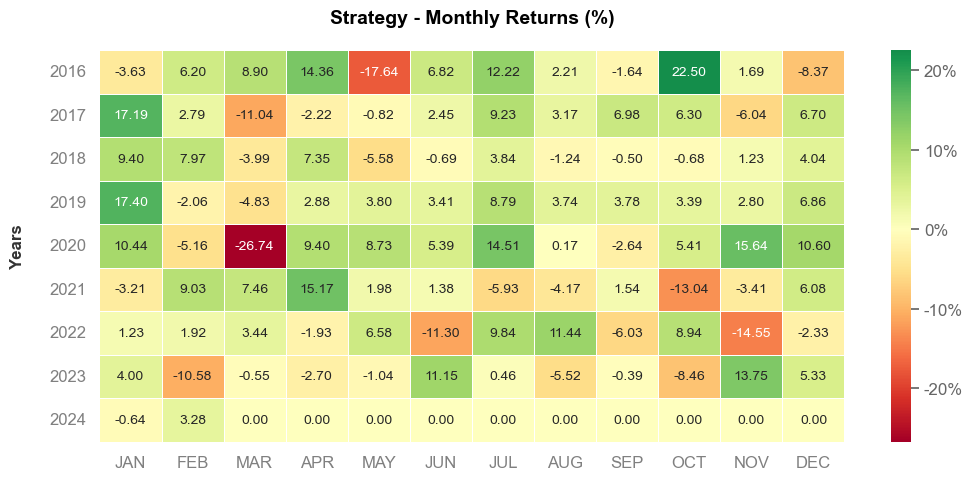

In [24]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap(retorno_modelo)

### Retorno acumulado modelo

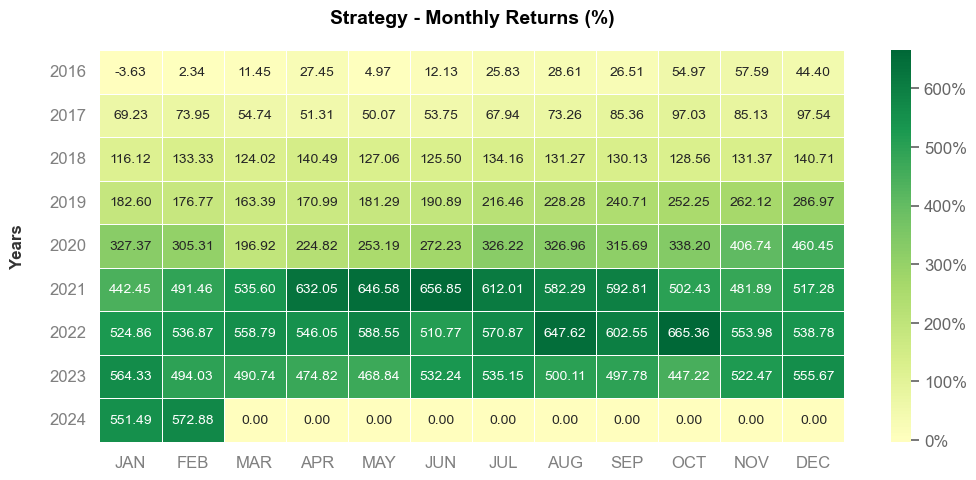

In [25]:
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1 
retorno_acum_modelo.plot_monthly_heatmap(retorno_acum_modelo)

### Fase 14 - Puxar e calcular a rentabilidade do Ibovespa no período.

### Retorno IBOV

In [27]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2024-02-29")['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2023-10-31   -0.029348
2023-11-30    0.125389
2023-12-31    0.053828
2024-01-31   -0.047941
2024-02-29    0.018810
Freq: M, Name: Adj Close, Length: 98, dtype: float64

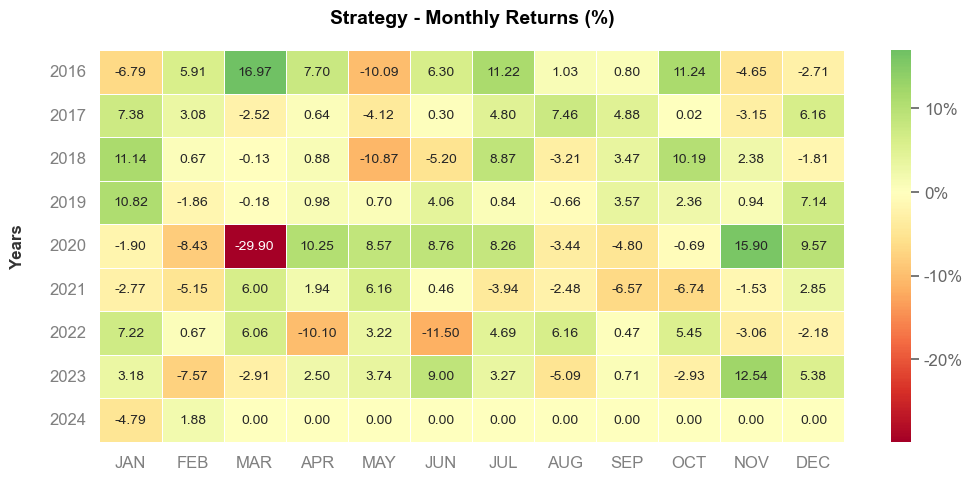

In [28]:
retornos_ibovespa.plot_monthly_heatmap(retornos_ibovespa)

### Retorno acumulado IBOV

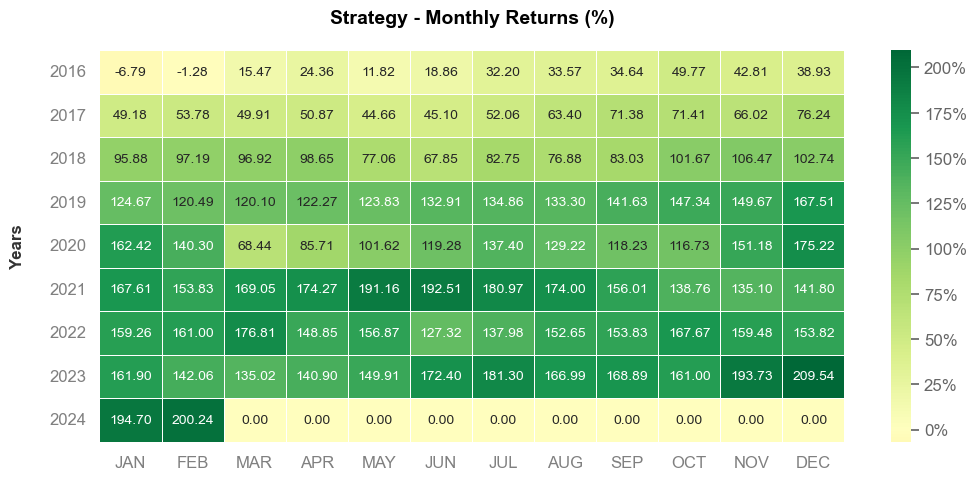

In [29]:
retorno_acum_ibov =  (1 + retornos_ibovespa).cumprod() - 1
retorno_acum_ibov.plot_monthly_heatmap(retorno_acum_ibov)

### Calculando o retorno diario do Modelo e IBOV

In [30]:
#Retorno diario Modelo
retorno_d = dados_cotacoes.pct_change()
retorno_d = retorno_d.drop(retorno_d.index[retorno_d.index < datetime(2016,1,31)])

carteiras_FI_d = carteiras_FI.resample('D').ffill()

datas_retorno_d = retorno_d.index
carteiras_FI_d = carteiras_FI_d[carteiras_FI_d.index.isin(datas_retorno_d)]

retorno_modelo_d = (retorno_d * carteiras_FI_d).sum(axis = 1)/10

#Retorno diario IBOV
retornos_ibovespa_d = ibovespa.pct_change().dropna()

# Dados de Risco do Modelo

## 1 - Calculando perda máxima por periodo
Cáculo da perda máxima em janelas de 1 mês, 3 meses, 6 meses, 12 meses, 24 meses e 36 meses.

In [31]:
def janela_maior_perda(retorno_modelo, periodo):
    win_3_m = (1+retorno_modelo).rolling(window=periodo).apply(np.prod)-1
    win_3_m = win_3_m.reset_index()
    win_3_m.columns = ["end_date","returns"]
    win_3_m.insert(0,"init_date",0)
    win_3_m["init_date"] = win_3_m["end_date"].shift(periodo-1)
    win_3_m.dropna(inplace=True)

    id_row = win_3_m["returns"].idxmin()
    row = win_3_m.loc[id_row]
    init_date_return = row[0]
    end_date_return = row[1]
    min_return = row[2]
    
    return periodo, init_date_return, end_date_return, min_return

janelas_de_perda = [1, 3,6,12,24,36]
perda_max_periodo = pd.DataFrame(columns=["periodo (meses)","data_ini","data_fin","retorno"]) 

for p in janelas_de_perda:
    perda_max_periodo.loc[len(perda_max_periodo)] = janela_maior_perda(retorno_modelo, p)

perda_max_periodo

,periodo (meses),data_ini,data_fin,retorno
0,1,2020-03-31,2020-03-31,-0.267422
1,3,2020-02-29,2020-04-30,-0.239949
2,6,2022-11-30,2023-04-30,-0.248956
3,12,2022-11-30,2023-10-31,-0.285012
4,24,2021-06-30,2023-05-31,-0.238063
5,36,2021-03-31,2024-02-29,0.137660


## 2 - Eventos de Estresse
Mostrar retorno mensal da carteira em momentos de estresse do mercado

In [32]:
# Buscando os retornos do modelo para os períodos históricos de estresse do mercado
joesley_day = datetime(2017, 5, 18)
auge_pandemia = datetime(2020, 3, 31)
boa_sorte_day = datetime(2022, 11, 22)
greve_dos_caminhoneiros = 2018
precatorios = {"data_ini":datetime(2021, 8, 1), "data_fin":datetime(2021, 11, 30)}

In [34]:
serie_retorno = retorno_modelo_d
serie_retorno = serie_retorno.reset_index()
serie_retorno.columns = ["data","retornos"]
serie_retorno["data"] = pd.to_datetime(serie_retorno["data"])

serie_retorno_ano = (1+retorno_modelo).rolling(window=12).apply(np.prod)-1
serie_retorno_ano = serie_retorno_ano.resample('Y').last()
serie_retorno_ano = serie_retorno_ano.reset_index()
serie_retorno_ano.columns = ["data","retornos"]
serie_retorno_ano["data"] = pd.to_datetime(serie_retorno_ano["data"])

eventos_estresse = pd.DataFrame(columns=["Evento","Data/Periodo","Retorno"])

valor_jd = serie_retorno["retornos"][(serie_retorno["data"].dt.month == joesley_day.month) & (serie_retorno["data"].dt.year == joesley_day.year)].min()
valor_ap = serie_retorno["retornos"][serie_retorno["data"] == auge_pandemia].min()
valor_bsd = serie_retorno["retornos"][(serie_retorno["data"].dt.month == boa_sorte_day.month) & (serie_retorno["data"].dt.year == boa_sorte_day.year) ].min()
valor_p = serie_retorno["retornos"][(serie_retorno["data"] >= precatorios["data_ini"]) & (serie_retorno["data"] <= precatorios["data_fin"]) ].min()
valor_gc = serie_retorno_ano["retornos"][serie_retorno_ano["data"].dt.year == greve_dos_caminhoneiros].min()

eventos_estresse.loc[len(eventos_estresse)] = ("Joeslay Day","18/05/2017",valor_jd)
eventos_estresse.loc[len(eventos_estresse)] = ("Auge Pandemia","31/03/2020",valor_ap)
eventos_estresse.loc[len(eventos_estresse)] = ("Boa Sorte Day","22/11/2022",valor_bsd)
eventos_estresse.loc[len(eventos_estresse)] = ("Greve dos Caminhoneiros","2018",valor_gc)
eventos_estresse.loc[len(eventos_estresse)] = ("Precatórios","ago/nov 2021",valor_p)

eventos_estresse

,Evento,Data/Periodo,Retorno
0,Joeslay Day,18/05/2017,-0.069724
1,Auge Pandemia,31/03/2020,-0.020941
2,Boa Sorte Day,22/11/2022,-0.057803
3,Greve dos Caminhoneiros,2018,0.218532
4,Precatórios,ago/nov 2021,-0.054004


## 3 - Máximo Drawdown
Calculo do drawdown máximo e gráfico de underater

In [36]:
serie_retorno = retorno_modelo_d
serie_retorno = retorno_modelo_d.reset_index()
serie_retorno.columns = ["data","retornos"]
serie_retorno["data"] = pd.to_datetime(serie_retorno["data"])


serie_retorno["retorno acumulado"] = (1 + serie_retorno['retornos']).cumprod()
serie_retorno['Max_Retorno_Acumulado'] = serie_retorno['retorno acumulado'].cummax()
serie_retorno['Drawdown'] = (serie_retorno['retorno acumulado'] - serie_retorno['Max_Retorno_Acumulado']) / serie_retorno['Max_Retorno_Acumulado']

max_drawdown_d = serie_retorno['Drawdown'].min()
print(f'Máximo drawdown {max_drawdown_d*100:.2f} %')

Máximo drawdown -45.98 %


# Gráfico underwater

NameError: name 'mplcyberpunk' is not defined

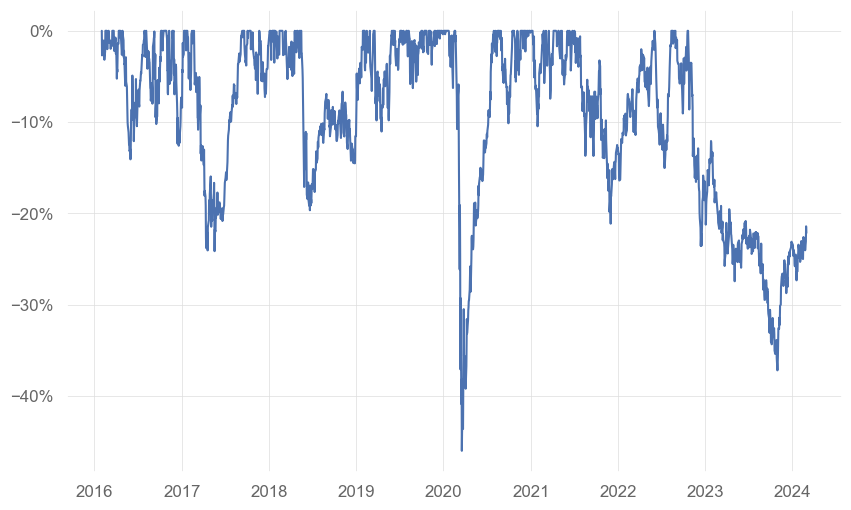

In [37]:
fig, ax = plt.subplots()

ax.plot(serie_retorno["data"], serie_retorno["Drawdown"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))

mplcyberpunk.add_gradient_fill(gradient_start='top')

plt.show()

# Gráficos de retorno em janelas de 1, 2 e 3 anos

## 1 - Janelas de Retornos para o Modelo

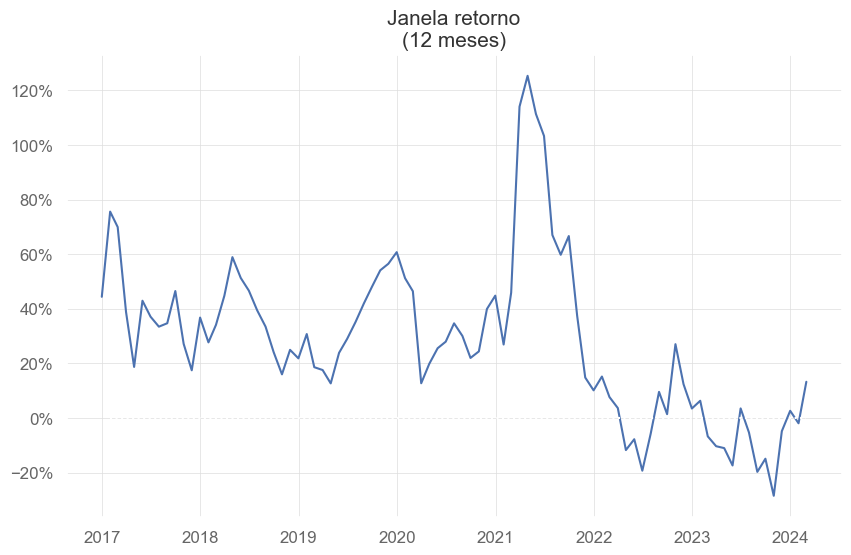

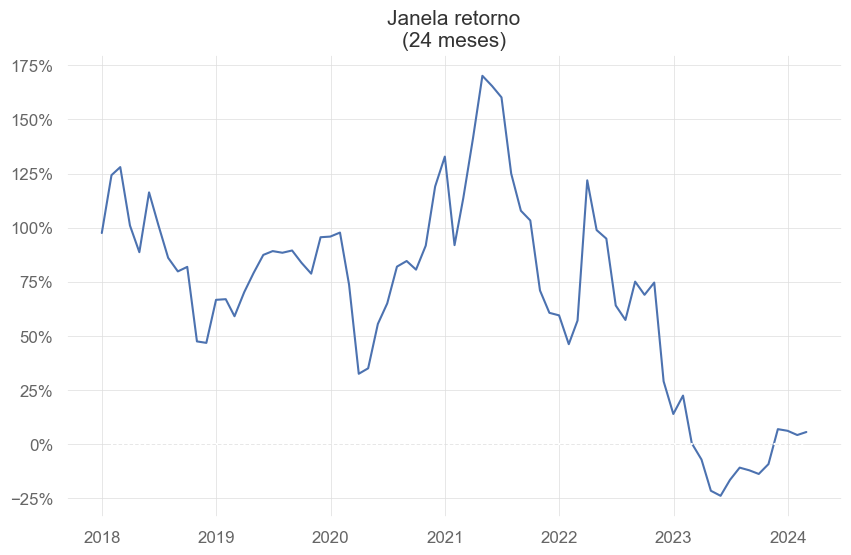

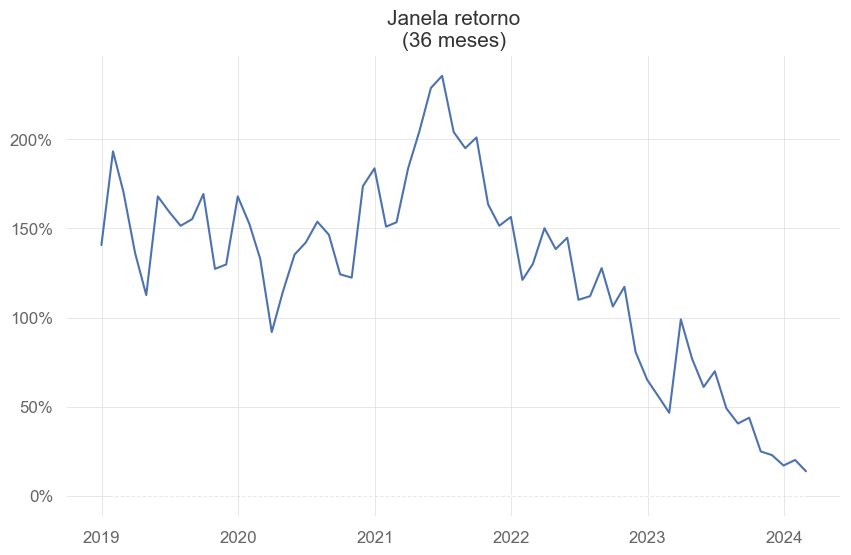

In [38]:

def janela_retorno (retorno_modelo, periodo):
    janela_retorno = (1+retorno_modelo).rolling(window=periodo).apply(np.prod)-1
    
    fig, ax = plt.subplots()

    ax.plot(janela_retorno.index, janela_retorno)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.xaxis.set_major_locator(mdate.YearLocator(1))
    
    title = "Janela retorno\n(" + str(periodo) + " meses)"
    plt.title(title, fontsize=15)
    plt.hlines(0,janela_retorno.index[periodo],janela_retorno.index[-1],linestyle='dotted', linewidth=1.5,color="white")
    
    plt.show()
    
for i in range(1,4):
    janela_retorno(retorno_modelo, i*12)

    

## 2 - Janelas de alfas (Modelo vs IBOV)

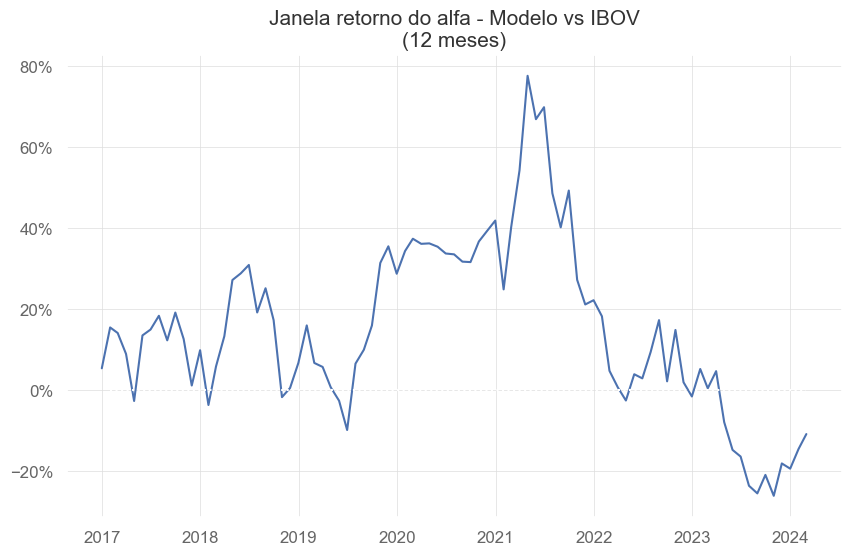

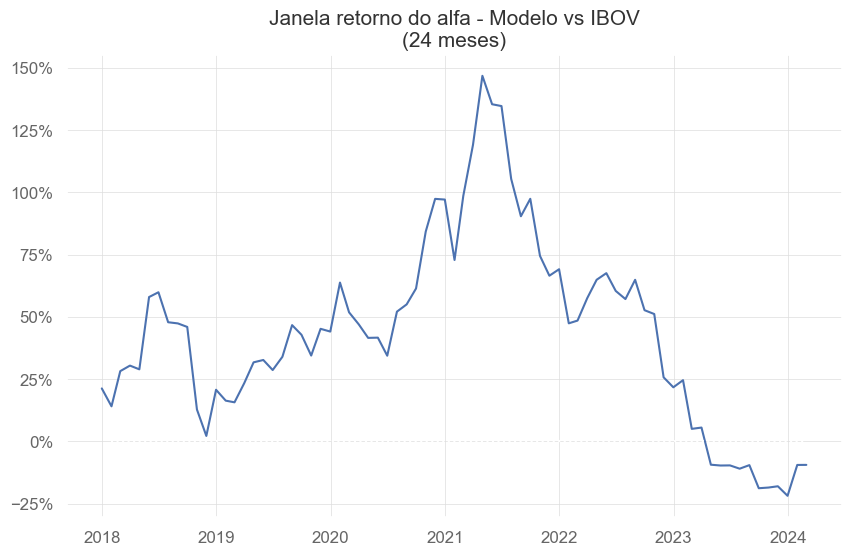

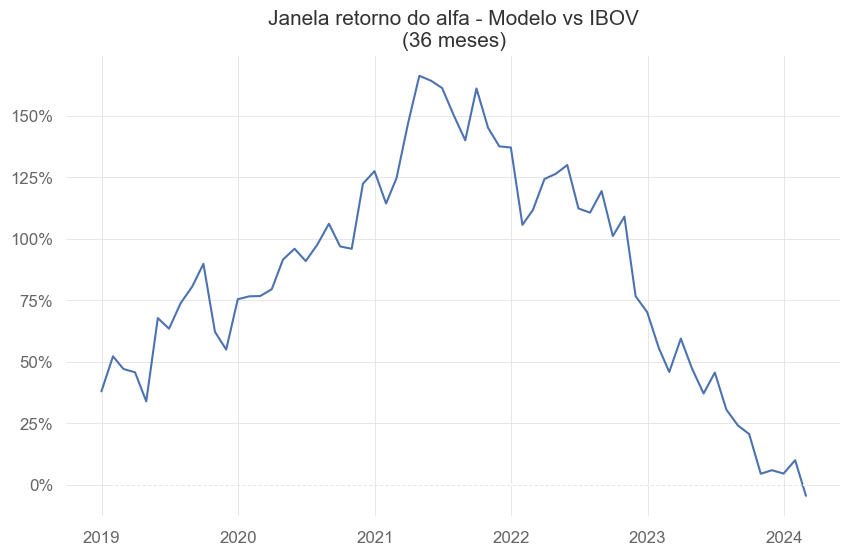

In [39]:
def janela_alfa (retorno_modelo, retorno_benchmark, periodo):
    retornos_modelo = (1+retorno_modelo).rolling(window=periodo).apply(np.prod)-1
    retornos_benchmark = (1+retorno_benchmark).rolling(window=periodo).apply(np.prod)-1
    janela_alfa = retornos_modelo - retornos_benchmark

    
    
    fig, ax = plt.subplots()

    ax.plot(janela_alfa.index, janela_alfa)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.xaxis.set_major_locator(mdate.YearLocator(1))
    
    title = "Janela retorno do alfa - Modelo vs IBOV\n(" + str(periodo) + " meses)"
    plt.title(title, fontsize=15)
    plt.hlines(0,janela_alfa.index[periodo],janela_alfa.index[-1],linestyle='dotted', linewidth=1.5, color="white")

    
    
    plt.show()
    
for i in range(1,4):
    janela_alfa(retorno_modelo, retornos_ibovespa, i*12)

# Indicadores da carteira
Calculo dos principais indicadores da carteira montada com o modelo proposto

In [41]:
# Retorno acumulado do Modelo !!
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1 
print(f'Retorno acumulado do modelo {retorno_acum_modelo[-1]*100:.2f} %')

# Retorno acumulado CDI
## 1. Importando dados do site do Banco Central
from bcb import sgs

date_min = date(2012,1,1)
selic = sgs.get({"juros":11}, start=date_min)/100
selic_periodo = selic[(selic.index.date >= retorno_modelo.index.date[0]) & (selic.index.date <= retorno_modelo.index.date[-1])]

## 2. Calculando retorno CDI no mesmo período do modelo
selic_acum = (1 + selic_periodo).cumprod() - 1
selic_acum = selic_acum.resample("M").last()
print(f'Retorno acumulado CDI {selic_acum["juros"][-1]*100:.2f} %')

# Retorno acumulado IBOV !!
retorno_acum_ibov =  (1 + retornos_ibovespa).cumprod() - 1
print(f'Retorno acumulado do IBOV {retorno_acum_ibov[-1]*100:.2f} %')

# Retorno a.a. do Modelo
valor_ini = 1
valor_fin = valor_ini * retorno_acum_modelo[-1]
anos = len(retorno_acum_modelo)/12
retorno_modelo_aa = (valor_fin/valor_ini)**(1/anos)-1
print(f'Retorno do modelo a.a. {retorno_modelo_aa*100:.2f} %')


# Vol 252 d
vol_12M = retorno_modelo.std()*np.sqrt(12)
print(f'Volatilidade 252d {vol_12M*100:.2f} %')

# Índice Sharpe
excesso_ret = retorno_acum_modelo[-1] - selic_acum["juros"][-1]
vol_modelo = vol_12M #retorno_modelo.std()
sharpe = excesso_ret/vol_modelo
print(f'Índice Sharpe todo periodo {sharpe:.2f}.')

# Var diário 95%
retorno_d = dados_cotacoes.pct_change()
retorno_d = retorno_d.drop(retorno_d.index[retorno_d.index < datetime(2016,1,31)])

carteiras_FI_d = carteiras_FI.resample('D').ffill()

datas_retorno_d = retorno_d.index
carteiras_FI_d = carteiras_FI_d[carteiras_FI_d.index.isin(datas_retorno_d)]

retorno_modelo_d = (retorno_d * carteiras_FI_d).sum(axis = 1)/10

retorno_modelo_d = retorno_modelo_d.reset_index()
retorno_modelo_d.set_index("Date", inplace=True)
retorno_modelo_d.columns = ["returns"]
var95 = retorno_modelo_d["returns"].quantile(0.05)
print(f'VAR diário 95% {var95*100:.2f} %')

# Turn over da Carteira

Retorno acumulado do modelo 572.88 %


ModuleNotFoundError: No module named 'bcb'

Grafico retorno acumulado Modelo vs IBOV vs CDI

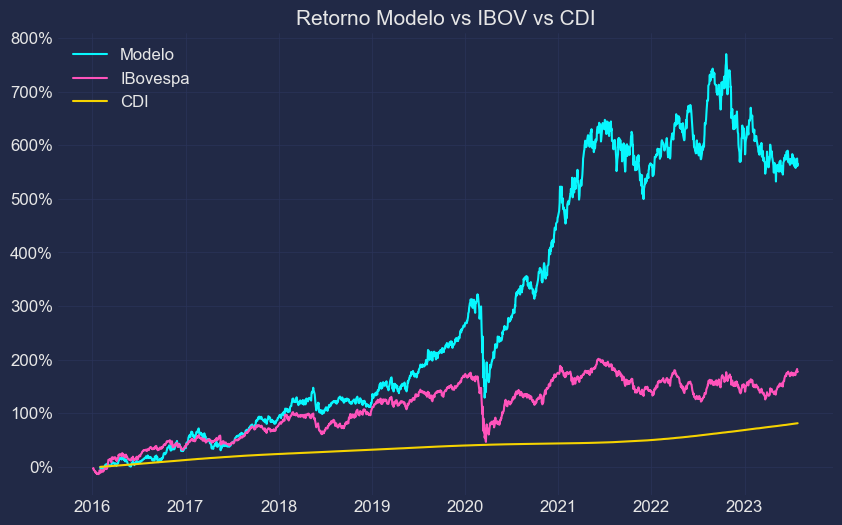

In [76]:
# Retorno modelo diario
ret_mod_d_acum = (1 + retorno_modelo_d).cumprod() - 1

#Retorno IBovespa diario
ret_ibov_d_acum = (1 + retornos_ibovespa_d).cumprod() - 1

#Retorno DI diario
selic_periodo_d = selic[(selic.index.date >= retorno_modelo_d.index.date[0]) & (selic.index.date <= retorno_modelo_d.index.date[-1])]
selic_acum = (1 + selic_periodo_d).cumprod() - 1

fig, ax = plt.subplots()

ax.plot(ret_mod_d_acum.index, ret_mod_d_acum, label="Modelo")
ax.plot(ret_ibov_d_acum.index, ret_ibov_d_acum, label="IBovespa")
ax.plot(selic_acum.index, selic_acum, label="CDI")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))

title = "Retorno Modelo vs IBOV vs CDI"
plt.title(title, fontsize=15)
    
plt.legend()
plt.show()

# Estatísticas de Trade

In [77]:
# Número de carteiras no período analisado !
df = carteiras_FI.diff().abs().sum(axis=1)

num_cart = 0
for i in df.index:
    if df[i] != 0:
        num_cart += 1

print(f'Numero de carteiras {num_cart}.')


# Percentual de trades vencedores e Percentual de trades perdedores

venc = 0
perd = 0

for r in retorno_modelo:
    if r >=0:
        venc += 1
    else:
        perd +=1
        
perc_vencedoras = venc/len(retorno_modelo)
perc_perdedoras = 1-perc_vencedoras

print(f'Operações vencedoras {perc_vencedoras*100:.2f}%.')
print(f'Operações perdedoras {perc_perdedoras*100:.2f}%.')
        
# Maior sequencia de vitórias !
maior_sequencia = 0
sequencia_atual = 0

for r in retorno_modelo:
    if r > 0:  # Verifica se o retorno é positivo
        sequencia_atual += 1
    else:
        maior_sequencia = max(maior_sequencia, sequencia_atual)
        sequencia_atual = 0

maior_sequencia_vitorias = max(maior_sequencia, sequencia_atual)

print(f'Maior sequencia de vitórias {maior_sequencia_vitorias}.')

# Maior sequencia de perdas !
maior_sequencia = 0
sequencia_atual = 0

for r in retorno_modelo:
    if r < 0:  # Verifica se o retorno é negativo
        sequencia_atual += 1
    else:
        maior_sequencia = max(maior_sequencia, sequencia_atual)
        sequencia_atual = 0

maior_sequencia_perdas = max(maior_sequencia, sequencia_atual)

print(f'Maior sequencia de perdas {maior_sequencia_perdas}.')


# Percentual de meses de retorno da Carteira maior que retorno Ibovespa !

comparativo_retornos = retorno_modelo
comparativo_retornos = comparativo_retornos.reset_index()
comparativo_retornos.columns = ["data","r_modelo"]
comparativo_retornos["data"] = pd.to_datetime(comparativo_retornos["data"])
r_ibov = retornos_ibovespa.reset_index()
comparativo_retornos["r_ibov"] = r_ibov["Adj Close"]

mod_venc = 0
ibov_venc = 0

for i in comparativo_retornos.index:
    if comparativo_retornos["r_modelo"][i] > comparativo_retornos["r_ibov"][i]:
        mod_venc += 1
    else:
        ibov_venc += 1
        
percent_carteira_venc = mod_venc/len(comparativo_retornos)

print(f'% Meses carteira > IBOV {percent_carteira_venc*100:.2f}%.')

Numero de carteiras 89.
Operações vencedoras 63.74%.
Operações perdedoras 36.26%.
Maior sequencia de vitórias 10.
Maior sequencia de perdas 4.
% Meses carteira > IBOV 58.24%.


# Rebalanceamento de carteiras

In [78]:
carteiras_FI

#Criando um DataFrame para rebalanceamento das Carteiras mês a mês

#Definindo as datas de rebalanceamento de acordo com o as datas da carteiras.
carteiras = pd.DataFrame(index=carteiras_FI.index)
carteiras = carteiras.reindex(columns=["cart_atual","vender","comprar"], fill_value=[])

#Preenchendo a coluna 'cart_atual' com a lista das empresas que compoem a carteira de cada mês
for data in carteiras_FI.index:
    lista=[]
    for empresa in carteiras_FI.columns:
        if carteiras_FI.loc[data, empresa] != 0:
            lista.append(empresa)
    carteiras.loc[data,"cart_atual"] = lista

#Preenchendo as colunas 'vender' e 'comprar' com as listas das empresas que
#devem sair e entrar na carteira do próximo mês
for i in range(len(carteiras.index)-1):
    lista_cart_atual = carteiras.iloc[i,0]
    lista_cart_prox = carteiras.iloc[i+1,0]
    lista_v = [item for item in lista_cart_atual if item not in lista_cart_prox]
    lista_c = [item for item in lista_cart_prox if item not in lista_cart_atual]
    carteiras.iloc[i,1] = lista_v
    carteiras.iloc[i,2] = lista_c


#Criando uma nova coluna com dicionários vazios que serão usados para armazenas
#a contribuição financeira de cada empresa na carteira mês a mês
carteiras['qtde_por_ativo'] = [{} for _ in range(len(carteiras))]

carteiras

,cart_atual,vender,comprar,qtde_por_ativo
Date,,,,
2016-01-31,"[BRKM5.SA, CSAN3.SA, ELET6.SA, EMBR3.SA, FIBR3...","[ELET6.SA, GFSA3.SA]","[EQTL3.SA, HYPE3.SA]",{}
2016-02-29,"[BRKM5.SA, CSAN3.SA, EMBR3.SA, EQTL3.SA, FIBR3...","[FIBR3.SA, KLBN11.SA, MRFG3.SA]","[CSNA3.SA, MULT3.SA, RADL3.SA]",{}
2016-03-31,"[BRKM5.SA, CSAN3.SA, CSNA3.SA, EMBR3.SA, EQTL3...","[EMBR3.SA, EQTL3.SA, MULT3.SA]","[BBAS3.SA, BBDC3.SA, CPFE3.SA]",{}
2016-04-30,"[BBAS3.SA, BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3...","[BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3.SA]","[BBDC4.SA, GGBR4.SA, MULT3.SA, PETR3.SA]",{}
2016-05-31,"[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, HYPE3...","[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, MRVE3...","[BRAP4.SA, CSAN3.SA, CYRE3.SA, ECOR3.SA, EQTL3...",{}
...,...,...,...,...
2023-03-31,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...",[PRIO3.SA],[UGPA3.SA],{}
2023-04-30,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...","[BRAP4.SA, GOAU4.SA, UGPA3.SA, VALE3.SA, WEGE3...","[BBAS3.SA, CMIG4.SA, CPLE6.SA, ECOR3.SA, SMTO3...",{}
2023-05-31,"[BBAS3.SA, BBSE3.SA, CMIG4.SA, CMIN3.SA, CPLE6...","[BBSE3.SA, CMIG4.SA, CPLE6.SA, CSNA3.SA, ECOR3...","[ALSO3.SA, AZUL4.SA, COGN3.SA, CYRE3.SA, IRBR3...",{}


In [79]:
#Criando uma nova coluna com dicionários vazios que serão usados para armazenas
#a contribuição financeira de cada empresa na carteira mês a mês
carteiras['qtde_por_ativo'] = [{} for _ in range(len(carteiras))]

v_ini = 1000
num_ativos = 10
valor_por_ativo = v_ini/num_ativos

#Recuperando o histórico dos preços das ações ao final de cada mês.
hist_preco_ativos = dados_cotacoes.resample("M").last()
hist_preco_ativos = hist_preco_ativos[hist_preco_ativos.index >= carteiras.index[0]]

#Criando uma nova coluna com dicionários vazios que serão usados para armazenar
#a quantidade de ações para cada empresa da carteira mês a mês
carteiras['qtde_por_ativo'] = [{} for _ in range(len(carteiras))]
qtde_cada_ativo=[]
for data in carteiras.index:
    carteira_m = carteiras.loc[data,"cart_atual"] 
    qtde_cada_ativo = {}
    for i in range(len(carteira_m)):
        preco_ativo = hist_preco_ativos.loc[data,carteira_m[i]]
        qtde_cada_ativo[carteira_m[i]] = (valor_por_ativo/preco_ativo)
        carteiras.at[data,"qtde_por_ativo"] = qtde_cada_ativo




In [80]:
hist_preco_ativos

,ABEV3.SA,ALPA4.SA,ALSO3.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VIVT4.SA,VVAR1.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,14.647091,5.275477,13.132404,12.547998,15.790649,NaN,NaN,2.645762,9.147167,6.598858,...,6.310662,7.101879,NaN,1.232770,18.006643,NaN,NaN,NaN,5.236888,8.961843
2016-02-29,13.943586,6.433332,12.828010,10.929818,14.801654,NaN,NaN,2.996467,8.942430,7.845279,...,7.667583,8.396697,NaN,2.236881,19.720179,NaN,NaN,NaN,4.493104,9.765424
2016-03-31,14.860512,5.642012,13.802070,13.437524,19.405872,NaN,NaN,3.958328,13.194314,10.148552,...,9.836060,11.162898,NaN,2.405890,22.302460,NaN,NaN,NaN,4.804008,9.068988
2016-04-30,15.326880,6.734014,15.370142,12.964373,20.153851,NaN,NaN,4.430233,14.756012,10.430732,...,12.783633,15.439720,NaN,2.953283,22.093283,NaN,NaN,NaN,5.190379,9.382336
2016-05-31,15.105552,7.303002,14.521209,9.368415,20.682690,NaN,NaN,4.129449,11.079048,9.107032,...,9.232264,11.025569,NaN,2.585365,21.423418,NaN,NaN,NaN,4.920262,8.584007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,14.330000,8.150000,17.109945,1.000000,62.827450,15.476805,12.030000,10.265085,38.274136,11.629038,...,80.290001,NaN,14.410000,1.880000,37.613945,NaN,NaN,NaN,40.334255,7.050000
2023-04-30,14.160000,7.410000,18.120985,1.040000,65.666603,12.290000,10.860000,11.584173,41.943989,12.206593,...,72.400002,NaN,13.200000,1.840000,40.684452,NaN,NaN,NaN,40.901222,8.120000
2023-05-31,14.410000,10.440000,21.670000,1.080000,72.977188,10.750000,16.850000,13.210717,43.666370,13.060607,...,63.810001,NaN,16.090000,2.380000,39.576317,NaN,NaN,NaN,37.409901,14.070000


In [81]:
carteiras

,cart_atual,vender,comprar,qtde_por_ativo
Date,,,,
2016-01-31,"[BRKM5.SA, CSAN3.SA, ELET6.SA, EMBR3.SA, FIBR3...","[ELET6.SA, GFSA3.SA]","[EQTL3.SA, HYPE3.SA]","{'BRKM5.SA': 6.725248517922948, 'CSAN3.SA': 21..."
2016-02-29,"[BRKM5.SA, CSAN3.SA, EMBR3.SA, EQTL3.SA, FIBR3...","[FIBR3.SA, KLBN11.SA, MRFG3.SA]","[CSNA3.SA, MULT3.SA, RADL3.SA]","{'BRKM5.SA': 6.329646046011532, 'CSAN3.SA': 19..."
2016-03-31,"[BRKM5.SA, CSAN3.SA, CSNA3.SA, EMBR3.SA, EQTL3...","[EMBR3.SA, EQTL3.SA, MULT3.SA]","[BBAS3.SA, BBDC3.SA, CPFE3.SA]","{'BRKM5.SA': 6.894744639075265, 'CSAN3.SA': 16..."
2016-04-30,"[BBAS3.SA, BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3...","[BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3.SA]","[BBDC4.SA, GGBR4.SA, MULT3.SA, PETR3.SA]","{'BBAS3.SA': 6.776898815986764, 'BBDC3.SA': 9...."
2016-05-31,"[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, HYPE3...","[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, MRVE3...","[BRAP4.SA, CSAN3.SA, CYRE3.SA, ECOR3.SA, EQTL3...","{'BBAS3.SA': 9.026046153538918, 'BBDC4.SA': 12..."
...,...,...,...,...
2023-03-31,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...",[PRIO3.SA],[UGPA3.SA],"{'BBSE3.SA': 3.0759767813880314, 'BRAP4.SA': 3..."
2023-04-30,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...","[BRAP4.SA, GOAU4.SA, UGPA3.SA, VALE3.SA, WEGE3...","[BBAS3.SA, CMIG4.SA, CPLE6.SA, ECOR3.SA, SMTO3...","{'BBSE3.SA': 2.9146020401458235, 'BRAP4.SA': 4..."
2023-05-31,"[BBAS3.SA, BBSE3.SA, CMIG4.SA, CMIN3.SA, CPLE6...","[BBSE3.SA, CMIG4.SA, CPLE6.SA, CSNA3.SA, ECOR3...","[ALSO3.SA, AZUL4.SA, COGN3.SA, CYRE3.SA, IRBR3...","{'BBAS3.SA': 2.2900918739670217, 'BBSE3.SA': 3..."


In [82]:
preco_ativos_ini = dados_cotacoes.resample("M").last()

In [83]:
preco_ativos_ini = preco_ativos_ini.loc["2015-12-31"]


In [84]:
preco_ativos_ini

ABEV3.SA    14.011282
ALPA4.SA     5.152456
ALSO3.SA    14.071676
AMER3.SA    14.412219
ARZZ3.SA    17.452820
              ...    
VIVT4.SA          NaN
VVAR1.SA          NaN
VVAR3.SA          NaN
WEGE3.SA     5.064133
YDUQ3.SA    10.676148
Name: 2015-12-31 00:00:00, Length: 130, dtype: float64

In [85]:

carteiras['tot_por_ativo'] = [[] for _ in range(len(carteiras))]
carteiras

,cart_atual,vender,comprar,qtde_por_ativo,tot_por_ativo
Date,,,,,
2016-01-31,"[BRKM5.SA, CSAN3.SA, ELET6.SA, EMBR3.SA, FIBR3...","[ELET6.SA, GFSA3.SA]","[EQTL3.SA, HYPE3.SA]","{'BRKM5.SA': 6.725248517922948, 'CSAN3.SA': 21...",[]
2016-02-29,"[BRKM5.SA, CSAN3.SA, EMBR3.SA, EQTL3.SA, FIBR3...","[FIBR3.SA, KLBN11.SA, MRFG3.SA]","[CSNA3.SA, MULT3.SA, RADL3.SA]","{'BRKM5.SA': 6.329646046011532, 'CSAN3.SA': 19...",[]
2016-03-31,"[BRKM5.SA, CSAN3.SA, CSNA3.SA, EMBR3.SA, EQTL3...","[EMBR3.SA, EQTL3.SA, MULT3.SA]","[BBAS3.SA, BBDC3.SA, CPFE3.SA]","{'BRKM5.SA': 6.894744639075265, 'CSAN3.SA': 16...",[]
2016-04-30,"[BBAS3.SA, BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3...","[BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3.SA]","[BBDC4.SA, GGBR4.SA, MULT3.SA, PETR3.SA]","{'BBAS3.SA': 6.776898815986764, 'BBDC3.SA': 9....",[]
2016-05-31,"[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, HYPE3...","[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, MRVE3...","[BRAP4.SA, CSAN3.SA, CYRE3.SA, ECOR3.SA, EQTL3...","{'BBAS3.SA': 9.026046153538918, 'BBDC4.SA': 12...",[]
...,...,...,...,...,...
2023-03-31,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...",[PRIO3.SA],[UGPA3.SA],"{'BBSE3.SA': 3.0759767813880314, 'BRAP4.SA': 3...",[]
2023-04-30,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...","[BRAP4.SA, GOAU4.SA, UGPA3.SA, VALE3.SA, WEGE3...","[BBAS3.SA, CMIG4.SA, CPLE6.SA, ECOR3.SA, SMTO3...","{'BBSE3.SA': 2.9146020401458235, 'BRAP4.SA': 4...",[]
2023-05-31,"[BBAS3.SA, BBSE3.SA, CMIG4.SA, CMIN3.SA, CPLE6...","[BBSE3.SA, CMIG4.SA, CPLE6.SA, CSNA3.SA, ECOR3...","[ALSO3.SA, AZUL4.SA, COGN3.SA, CYRE3.SA, IRBR3...","{'BBAS3.SA': 2.2900918739670217, 'BBSE3.SA': 3...",[]


In [86]:
lista_tot_val=[]
for empresa in carteiras.loc["2016-01-31","cart_atual"]:
    tot_val_compra = preco_ativos_ini[empresa] * carteiras.loc["2016-01-31","qtde_por_ativo"][empresa]
    lista_tot_val.append(tot_val_compra)
    print(lista_tot_val)
carteiras.at["2016-01-31","tot_por_ativo"] = lista_tot_val

[115.08332161764721]
[115.08332161764721, 100.23868101013755]
[115.08332161764721, 100.23868101013755, 103.88059695202516]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.77121410013986]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.77121410013986, 103.18471235847919]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.77121410013986, 103.18471235847919, 111.66666195493976]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.77121410013986, 103.18471235847919, 111.66666195493976, 104.09836239923048]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.77121410013986, 103.18471235847919, 111.66666195493976, 104.09836239923048, 94.86338553860024]
[115.08332161764721, 100.23868101013755, 103.88059695202516, 104.97218497787279, 117.7712141

In [87]:
carteiras

,cart_atual,vender,comprar,qtde_por_ativo,tot_por_ativo
Date,,,,,
2016-01-31,"[BRKM5.SA, CSAN3.SA, ELET6.SA, EMBR3.SA, FIBR3...","[ELET6.SA, GFSA3.SA]","[EQTL3.SA, HYPE3.SA]","{'BRKM5.SA': 6.725248517922948, 'CSAN3.SA': 21...","[115.08332161764721, 100.23868101013755, 103.8..."
2016-02-29,"[BRKM5.SA, CSAN3.SA, EMBR3.SA, EQTL3.SA, FIBR3...","[FIBR3.SA, KLBN11.SA, MRFG3.SA]","[CSNA3.SA, MULT3.SA, RADL3.SA]","{'BRKM5.SA': 6.329646046011532, 'CSAN3.SA': 19...",[]
2016-03-31,"[BRKM5.SA, CSAN3.SA, CSNA3.SA, EMBR3.SA, EQTL3...","[EMBR3.SA, EQTL3.SA, MULT3.SA]","[BBAS3.SA, BBDC3.SA, CPFE3.SA]","{'BRKM5.SA': 6.894744639075265, 'CSAN3.SA': 16...",[]
2016-04-30,"[BBAS3.SA, BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3...","[BBDC3.SA, BRKM5.SA, CPFE3.SA, CSAN3.SA]","[BBDC4.SA, GGBR4.SA, MULT3.SA, PETR3.SA]","{'BBAS3.SA': 6.776898815986764, 'BBDC3.SA': 9....",[]
2016-05-31,"[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, HYPE3...","[BBAS3.SA, BBDC4.SA, CSNA3.SA, GGBR4.SA, MRVE3...","[BRAP4.SA, CSAN3.SA, CYRE3.SA, ECOR3.SA, EQTL3...","{'BBAS3.SA': 9.026046153538918, 'BBDC4.SA': 12...",[]
...,...,...,...,...,...
2023-03-31,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...",[PRIO3.SA],[UGPA3.SA],"{'BBSE3.SA': 3.0759767813880314, 'BRAP4.SA': 3...",[]
2023-04-30,"[BBSE3.SA, BRAP4.SA, CMIN3.SA, CSNA3.SA, EMBR3...","[BRAP4.SA, GOAU4.SA, UGPA3.SA, VALE3.SA, WEGE3...","[BBAS3.SA, CMIG4.SA, CPLE6.SA, ECOR3.SA, SMTO3...","{'BBSE3.SA': 2.9146020401458235, 'BRAP4.SA': 4...",[]
2023-05-31,"[BBAS3.SA, BBSE3.SA, CMIG4.SA, CMIN3.SA, CPLE6...","[BBSE3.SA, CMIG4.SA, CPLE6.SA, CSNA3.SA, ECOR3...","[ALSO3.SA, AZUL4.SA, COGN3.SA, CYRE3.SA, IRBR3...","{'BBAS3.SA': 2.2900918739670217, 'BBSE3.SA': 3...",[]


In [88]:

empresa = carteiras.loc["2016-01-31","cart_atual"][0]
tot_val_compra = preco_ativos_ini[empresa] * carteiras.loc["2016-01-31","qtde_por_ativo"][empresa]
tot_val_compra

115.08332161764721

In [89]:
retorno_mensal[]

SyntaxError: invalid syntax (2957761924.py, line 1)